<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/ML1_customerLifeTimeValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/E-commerce Customer Behavior - Sheet1.csv")
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
data.isnull().sum()


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
data['Satisfaction Level']=data['Satisfaction Level'].fillna(data['Satisfaction Level'].mode()[0])
print(data.duplicated().sum())

0


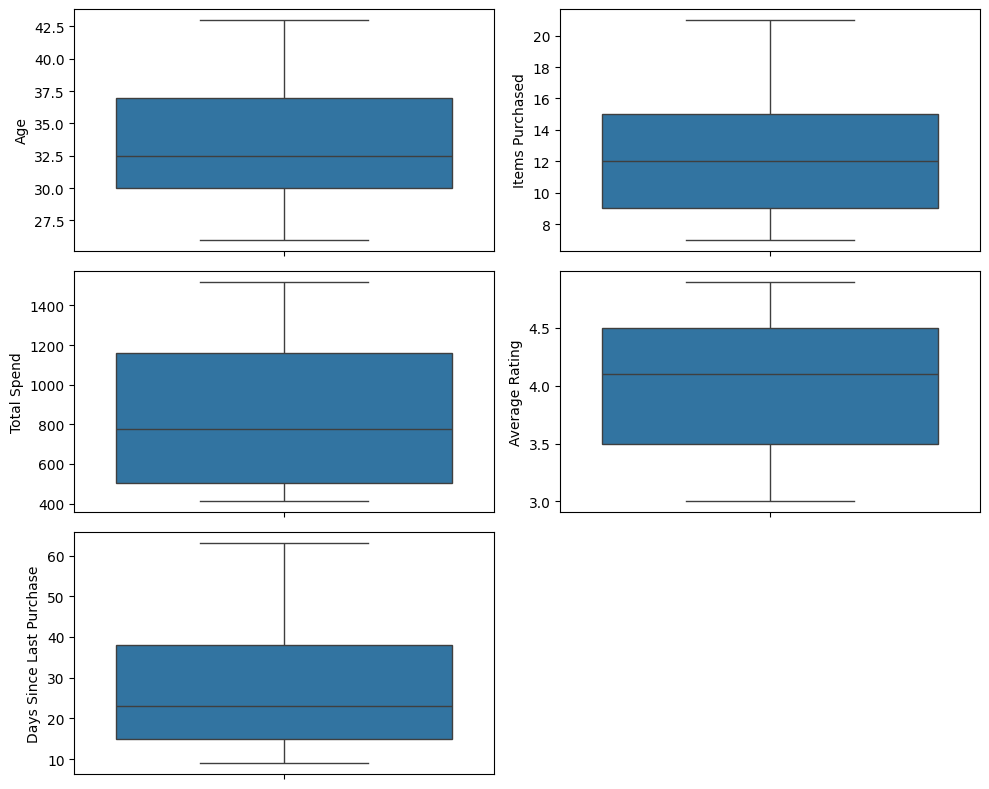

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num=['Age','Items Purchased','Total Spend','Average Rating','Days Since Last Purchase']
plt.figure(figsize=(10,8))
for i,n in enumerate(num):
  plt.subplot(3,2,i+1)
  sns.boxplot(data[num[i]])
  plt.tight_layout()


In [ ]:
def find(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  l=q1-1.5*iqr
  u=q3+1.5*iqr
  print(l,u)
  return data[(data[column]<l) | (data[column]>u) ]
find(data,'Age')
find(data,'Items Purchased')
find(data,'Total Spend')
find(data,'Average Rating')
find(data,'Days Since Last Purchase')

19.5 47.5
0.0 24.0
-485.89999999999986 2148.5
2.0 6.0
-19.5 72.5


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Membership Type']=le.fit_transform(data['Membership Type'])
data['Satisfaction Level']=le.fit_transform(data['Satisfaction Level'])
data=pd.get_dummies(data,columns=['Gender', 'City'])
data.head()

,Customer ID,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,101,29,1,1120.20,14,4.6,True,25,1,True,False,False,False,False,False,True,False
1,102,34,2,780.50,11,4.1,False,18,0,False,True,False,False,True,False,False,False
2,103,43,0,510.75,9,3.4,True,42,2,True,False,True,False,False,False,False,False
3,104,30,1,1480.30,19,4.7,False,12,1,False,True,False,False,False,False,False,True
4,105,27,2,720.40,13,4.0,True,55,2,False,True,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scalar=StandardScaler()
x=data.drop(columns=['Customer ID','Total Spend'])
y=data['Total Spend']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y_test,y_pred))
print("mean squared",mean_squared_error(y_test,y_pred))

r2_score 0.9980814212712928
mean squared 259.4238201096801


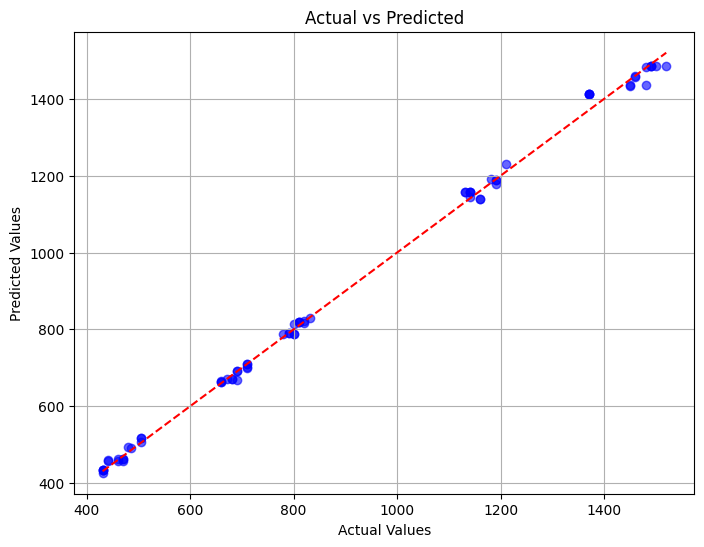

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()
